In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow")
path_to_structure = os.path.join(path_to_results, "amiris_data_structure.xlsx")
path_to_load = os.path.join(path_to_results, "amiris-config", "data","load.csv")
path_to_output = os.path.join(path_to_results, "output","amiris_results.csv" )
path_to_storage_levels = os.path.join(path_to_results, "output","final_storage_levels.csv" )
path_to_generation = os.path.join(path_to_results, "output","hourly_generation_per_group.csv" )
path_to_plots = os.path.join(os.getcwd(),  "Scenarios")

generation_data =  pd.read_csv(path_to_generation, index_col="Unnamed: 0")
load_data = pd.read_csv(path_to_load, sep=";", header=None) 
results_data = pd.read_csv(path_to_output) 
storage_levels_data = pd.read_csv(path_to_storage_levels) 
storages_data = pd.read_excel(path_to_structure, sheet_name='storages', index_col=0)
conventionals_data = pd.read_excel(path_to_structure, sheet_name='conventionals', index_col=0)
biogas_data = pd.read_excel(path_to_structure, sheet_name='biogas', index_col=0)

In [3]:
conventionals_join = pd.merge(conventionals_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')

In [14]:
storage_levels_data.head()

,Unnamed: 0,value
0,20502600030,1500.0
1,20512600204,500.0
2,20512600206,500.0
3,20512600214,500.0
4,20512600219,500.0


<AxesSubplot:>

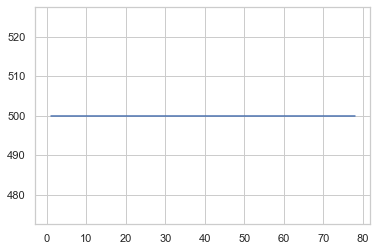

In [42]:
storage_levels_data["value"][1:].plot()

In [6]:
load_generation = pd.concat([generation_data, 
                      load_data],   axis=1 )
load_generation.drop(0, axis=1, inplace=True)
load_generation.sort_values(by=1, inplace=True) # sorting by increasing load
load_generation.reset_index(inplace=True )
load_generation.drop("index", axis=1, inplace=True)

In [7]:
#load_generation.rename(columns={1: "load" }, inplace=True)
load_generation["storages_charging"] = load_generation["storages_charging"]*-1
load_generation.drop("storages_aggregated_level", axis=1, inplace=True)
load_generation.drop(1, axis=1, inplace=True)
load_generation.head()

,res,conventionals,storages_discharging,storages_charging,load_shedding
0,22334.61968,25743.19332,0.0,-0.0,0.0
1,25507.70968,22623.85332,0.0,-0.0,0.0
2,25737.72968,22483.08332,0.0,-0.0,0.0
3,20001.83968,28296.97332,0.0,-0.0,0.0
4,31272.93968,17045.12332,0.0,-0.0,0.0


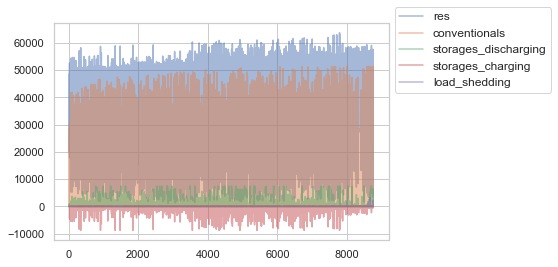

In [28]:
load_generation.plot(alpha=0.5)
axs1= plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
fig1 = axs1.get_figure()
fig1.savefig(path_to_plots + '/' + 'testing.png', bbox_inches='tight', dpi=300)

In [9]:
# plt.stackplot(load_generation.res, load_generation.conventionals, load_generation.load_shedding, load_generation.storages_discharging,
#               load_generation.storages_charging,
#               labels=['RES', 'conventional', "load shedding", "dish", "charg"])

In [10]:
storages = load_generation[["storages_charging", "storages_discharging"]].copy()

<AxesSubplot:>

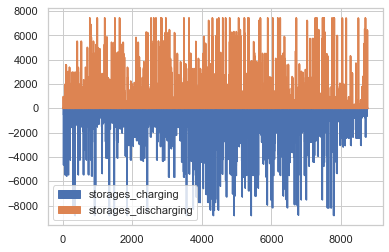

In [11]:
storages.plot.area()

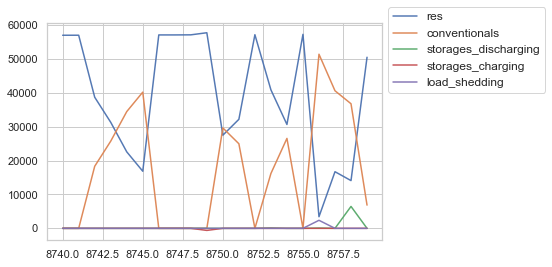

In [40]:
load_generation.iloc[8740:8760,0:5].plot( alpha=0.95)
axs1= plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))

<AxesSubplot:>

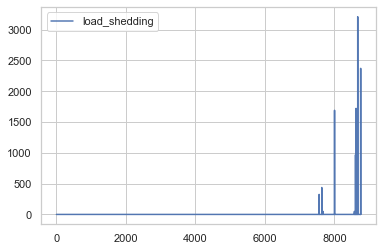

In [26]:
load_generation[["load_shedding"]].plot( alpha=0.95)